#WHAT DOES IT MEAN: 1-IN-200 or 1-IN-1000 EVENT?
Dotcom, GFC, COVID — all within 25 years, and all worse than the 99.9% VaR.


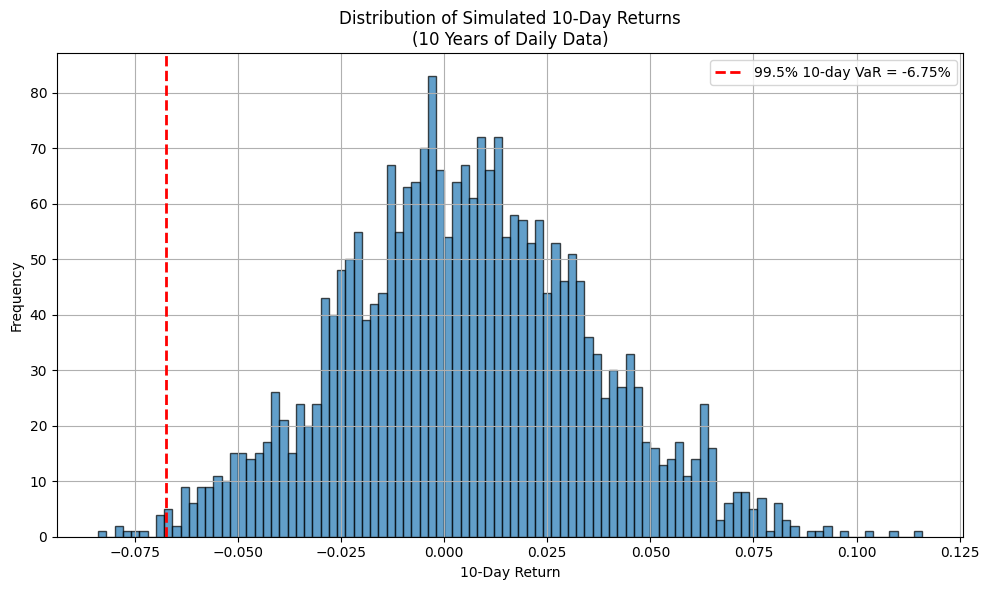

,Metric,Value
0,Mean 10-day Return,0.005275
1,Standard Deviation,0.030140
2,99.5% 10-day VaR (Loss),-0.067516


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Simulate 10 years of daily returns (assume 250 trading days per year)
np.random.seed(42)
trading_days = 10 * 250
daily_returns = np.random.normal(loc=0.0002, scale=0.01, size=trading_days)  # Mean = 0.02%, Std = 1%

# Create rolling 10-day returns
rolling_returns = pd.Series(daily_returns).rolling(window=10).sum().dropna()

# Compute 99.5% VaR (1-in-200) over 10-day horizon
var_995 = np.percentile(rolling_returns, 0.5)

# Plot histogram of 10-day returns
plt.figure(figsize=(10, 6))
plt.hist(rolling_returns, bins=100, alpha=0.7, edgecolor='black')
plt.axvline(var_995, color='red', linestyle='dashed', linewidth=2, label=f'99.5% 10-day VaR = {var_995:.2%}')
plt.title('Distribution of Simulated 10-Day Returns\n(10 Years of Daily Data)')
plt.xlabel('10-Day Return')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Show key statistics
summary = {
    "Mean 10-day Return": rolling_returns.mean(),
    "Standard Deviation": rolling_returns.std(),
    "99.5% 10-day VaR (Loss)": var_995
}

summary_df = pd.DataFrame.from_dict(summary, orient='index', columns=['Value'])
summary_df.index.name = "Metric"
summary_df.reset_index(inplace=True)

display(summary_df)

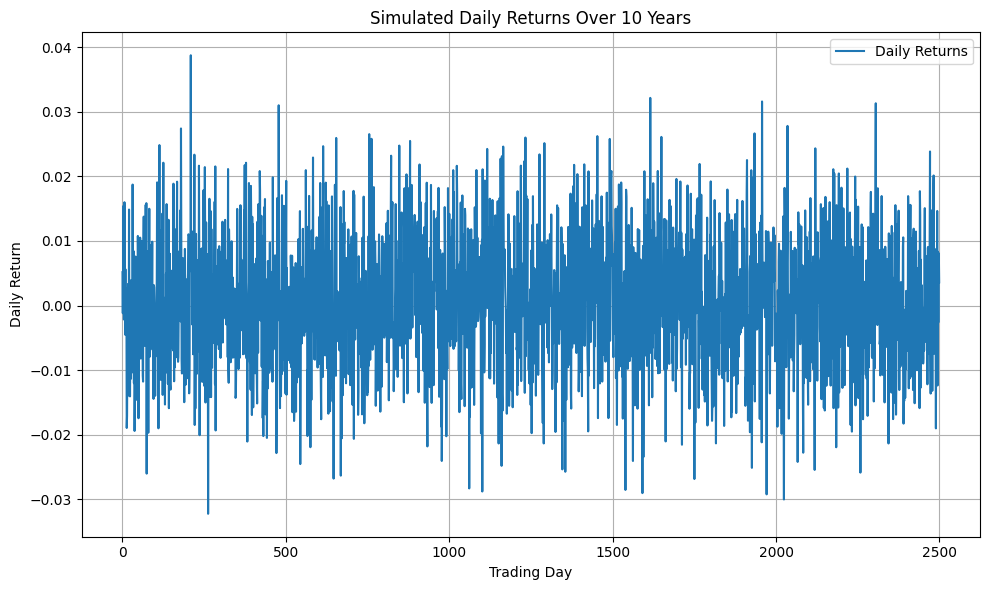

In [6]:
# prompt: plot the returns

import matplotlib.pyplot as plt
# The previous code already plots the returns and the VaR.
# If you wanted to plot the daily returns instead of the rolling returns:
plt.figure(figsize=(10, 6))
plt.plot(daily_returns, label='Daily Returns')
plt.title('Simulated Daily Returns Over 10 Years')
plt.xlabel('Trading Day')
plt.ylabel('Daily Return')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

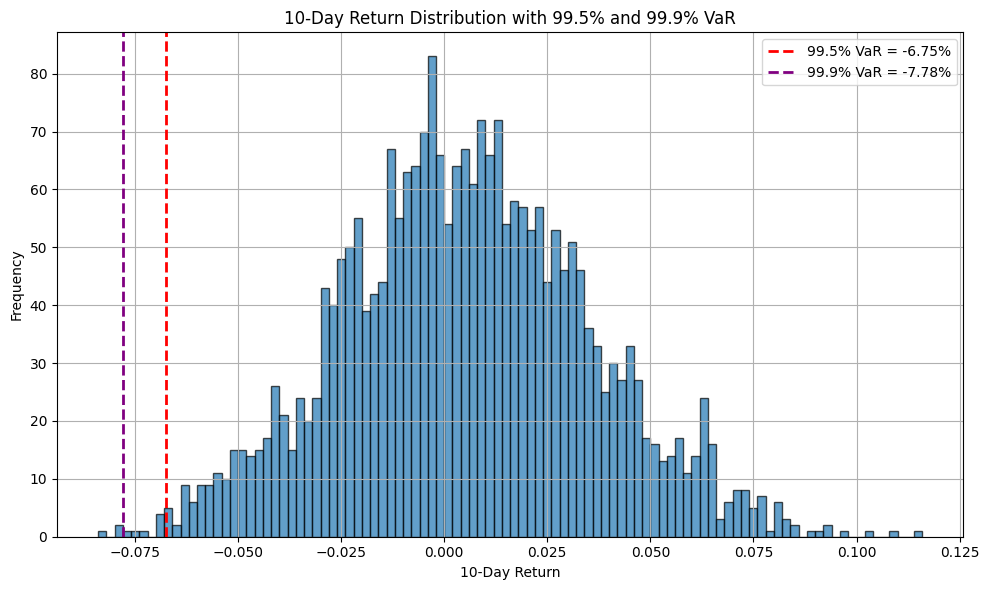

,Metric,Value
0,Mean 10-day Return,0.005275
1,Standard Deviation,0.030140
2,99.5% 10-day VaR (Loss),-0.067516
3,99.9% 10-day VaR (Loss),-0.077799


In [7]:
# Re-import necessary libraries after reset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Simulate 10 years of daily returns again
np.random.seed(42)
trading_days = 10 * 250
daily_returns = np.random.normal(loc=0.0002, scale=0.01, size=trading_days)

# Create rolling 10-day returns
rolling_returns = pd.Series(daily_returns).rolling(window=10).sum().dropna()

# Compute 99.5% and 99.9% VaR over 10-day horizon
var_995 = np.percentile(rolling_returns, 0.5)
var_999 = np.percentile(rolling_returns, 0.1)

# Plot histogram with both VaR levels
plt.figure(figsize=(10, 6))
plt.hist(rolling_returns, bins=100, alpha=0.7, edgecolor='black')
plt.axvline(var_995, color='red', linestyle='dashed', linewidth=2, label=f'99.5% VaR = {var_995:.2%}')
plt.axvline(var_999, color='purple', linestyle='dashed', linewidth=2, label=f'99.9% VaR = {var_999:.2%}')
plt.title('10-Day Return Distribution with 99.5% and 99.9% VaR')
plt.xlabel('10-Day Return')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Create updated summary DataFrame
summary = {
    "Mean 10-day Return": rolling_returns.mean(),
    "Standard Deviation": rolling_returns.std(),
    "99.5% 10-day VaR (Loss)": var_995,
    "99.9% 10-day VaR (Loss)": var_999
}

summary_df = pd.DataFrame.from_dict(summary, orient='index', columns=['Value'])
summary_df.index.name = "Metric"
summary_df.reset_index(inplace=True)

display(summary_df)

#NASDAQ 10 DAYS VAR CALCULATIONS

In [ ]:
import yfinance as yf
import pandas as pd

# Define specific start and end dates
start_date = "2000-01-01"
end_date = "2025-06-27"

nasdaq = yf.Ticker("^IXIC")
data = nasdaq.history(start=start_date, end=end_date)

pd.set_option('display.max_rows', None)

data.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-01-03 00:00:00-05:00,4186.189941,4192.189941,3989.709961,4131.149902,1510070000,0.0,0.0
2000-01-04 00:00:00-05:00,4020.000000,4073.250000,3898.229980,3901.689941,1511840000,0.0,0.0
2000-01-05 00:00:00-05:00,3854.350098,3924.209961,3734.870117,3877.540039,1735670000,0.0,0.0
2000-01-06 00:00:00-05:00,3834.439941,3868.760010,3715.620117,3727.129883,1598320000,0.0,0.0
2000-01-07 00:00:00-05:00,3711.090088,3882.669922,3711.090088,3882.620117,1634930000,0.0,0.0


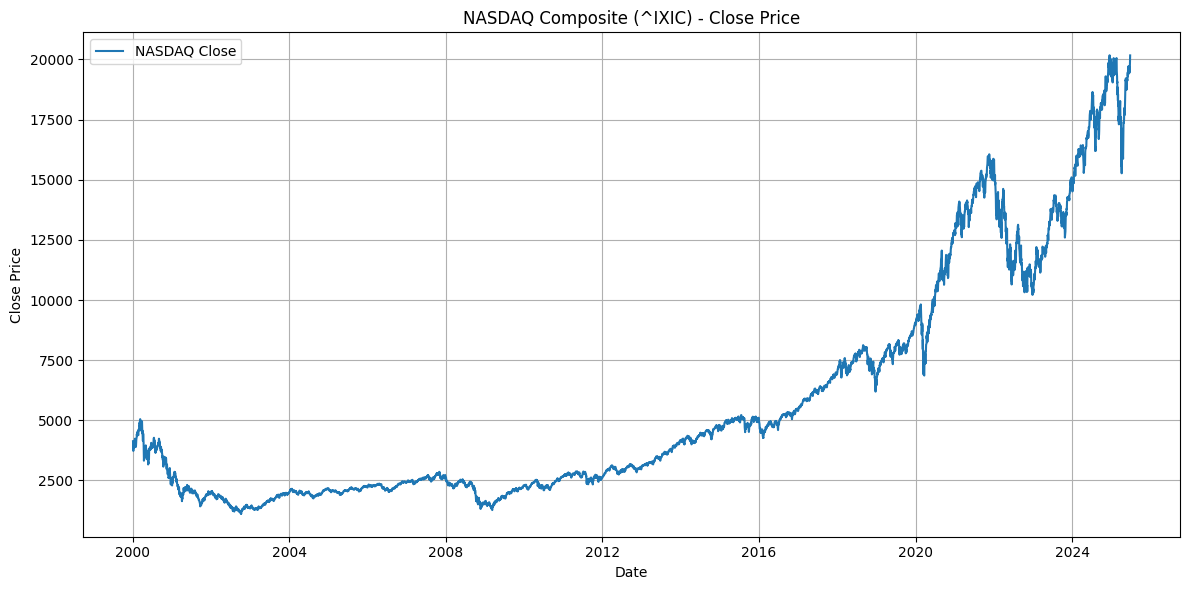

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt


import numpy as np




# Define specific start and end dates
start_date = "2000-01-01"
end_date = "2025-06-27"

# Fetch data
nasdaq = yf.Ticker("^IXIC")
data = nasdaq.history(start=start_date, end=end_date)

# Plot only the 'Close' column
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='NASDAQ Close')
plt.title('NASDAQ Composite (^IXIC) - Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


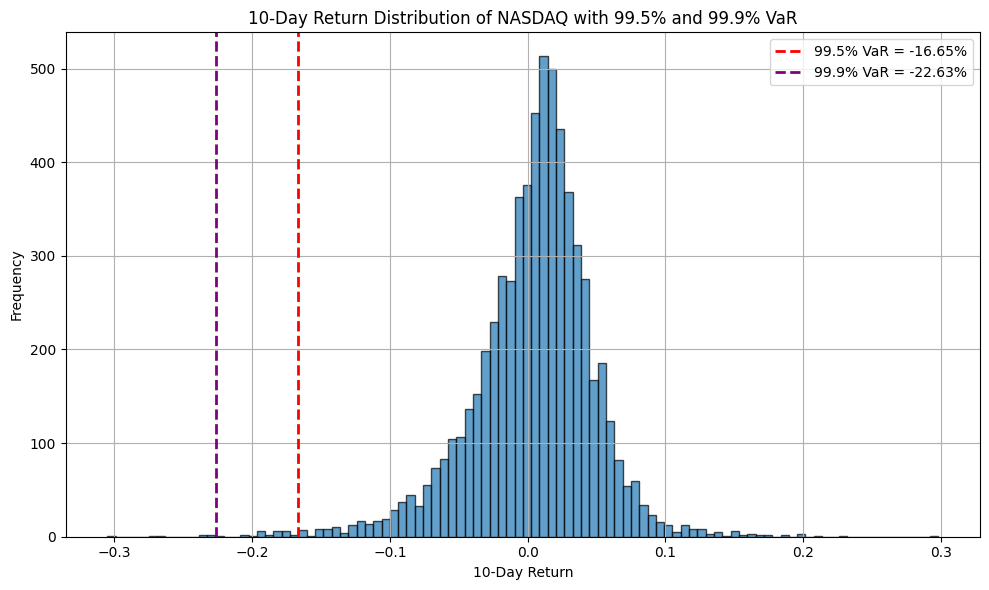

                 Metric     Value
     Mean 10-day Return  0.003760
     Standard Deviation  0.044728
99.5% 10-day VaR (Loss) -0.166478
99.9% 10-day VaR (Loss) -0.226280


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Download NASDAQ data
# Define specific start and end dates
start_date = "2000-01-01"
end_date = "2025-06-27"
nasdaq = yf.Ticker("^IXIC")
data = nasdaq.history(start=start_date, end=end_date)

# Step 2: Calculate daily returns
data['Daily_Return'] = data['Close'].pct_change()

# Step 3: Compute rolling 10-day returns (cumulative sum of 10 daily returns)
rolling_returns = data['Daily_Return'].rolling(window=10).sum().dropna()

# Step 4: Calculate VaR thresholds
var_995 = np.percentile(rolling_returns, 0.5)
var_999 = np.percentile(rolling_returns, 0.1)

# Step 5: Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(rolling_returns, bins=100, alpha=0.7, edgecolor='black')
plt.axvline(var_995, color='red', linestyle='dashed', linewidth=2, label=f'99.5% VaR = {var_995:.2%}')
plt.axvline(var_999, color='purple', linestyle='dashed', linewidth=2, label=f'99.9% VaR = {var_999:.2%}')
plt.title('10-Day Return Distribution of NASDAQ with 99.5% and 99.9% VaR')
plt.xlabel('10-Day Return')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 6: Create summary DataFrame
summary = {
    "Mean 10-day Return": rolling_returns.mean(),
    "Standard Deviation": rolling_returns.std(),
    "99.5% 10-day VaR (Loss)": var_995,
    "99.9% 10-day VaR (Loss)": var_999
}

summary_df = pd.DataFrame.from_dict(summary, orient='index', columns=['Value'])
summary_df.index.name = "Metric"
summary_df.reset_index(inplace=True)

print(summary_df.to_string(index=False))


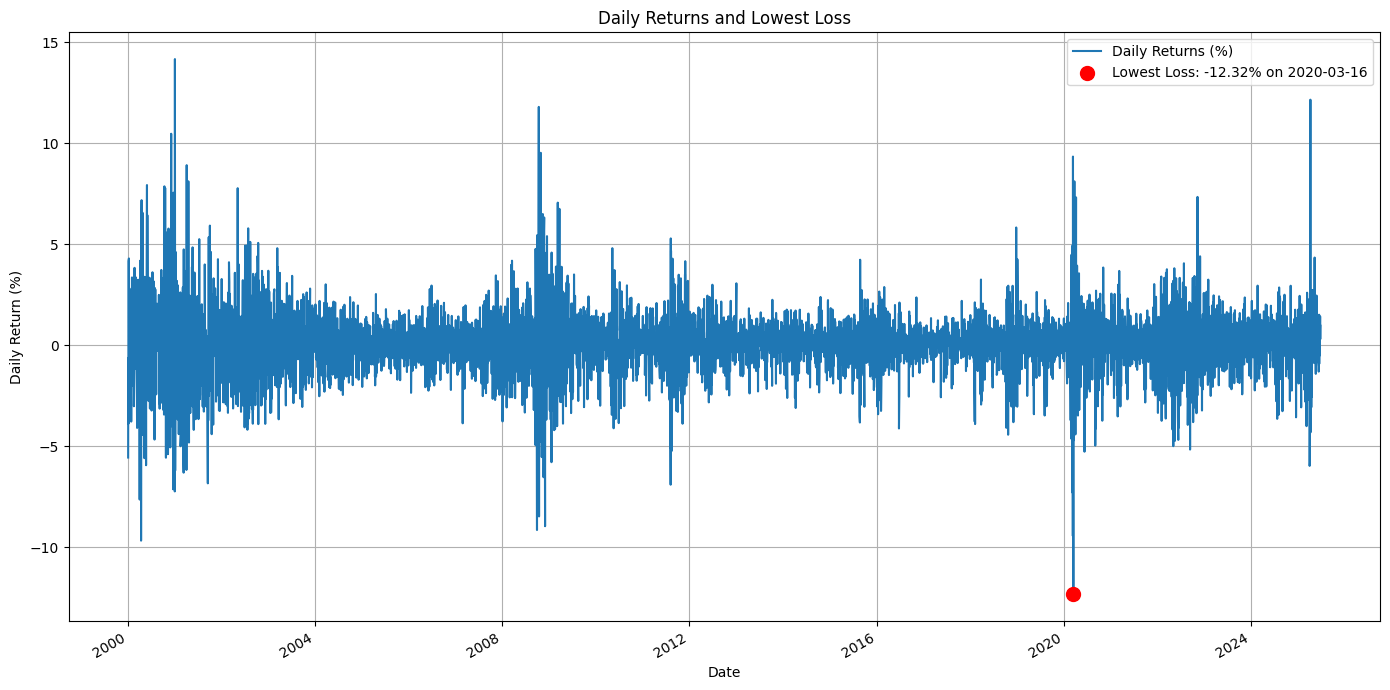

In [ ]:
# prompt: show me the daily returns to and  flag lowest losses in percent and in chart. dont print the data.

import matplotlib.pyplot as plt
# Calculate daily returns
data['Daily_Return'] = data['Close'].pct_change() * 100 # Express in percentage

# Find the index and value of the minimum daily return (largest loss)
lowest_loss_index = data['Daily_Return'].idxmin()
lowest_loss_value = data['Daily_Return'].min()

# Create a figure and axis for the plot
plt.figure(figsize=(14, 7))
ax = plt.gca()

# Plot the daily returns
data['Daily_Return'].plot(ax=ax, label='Daily Returns (%)')

# Flag the lowest loss point
ax.scatter(lowest_loss_index, lowest_loss_value, color='red', s=100, zorder=5, label=f'Lowest Loss: {lowest_loss_value:.2f}% on {lowest_loss_index.strftime("%Y-%m-%d")}')

# Set title and labels
plt.title('Daily Returns and Lowest Loss')
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


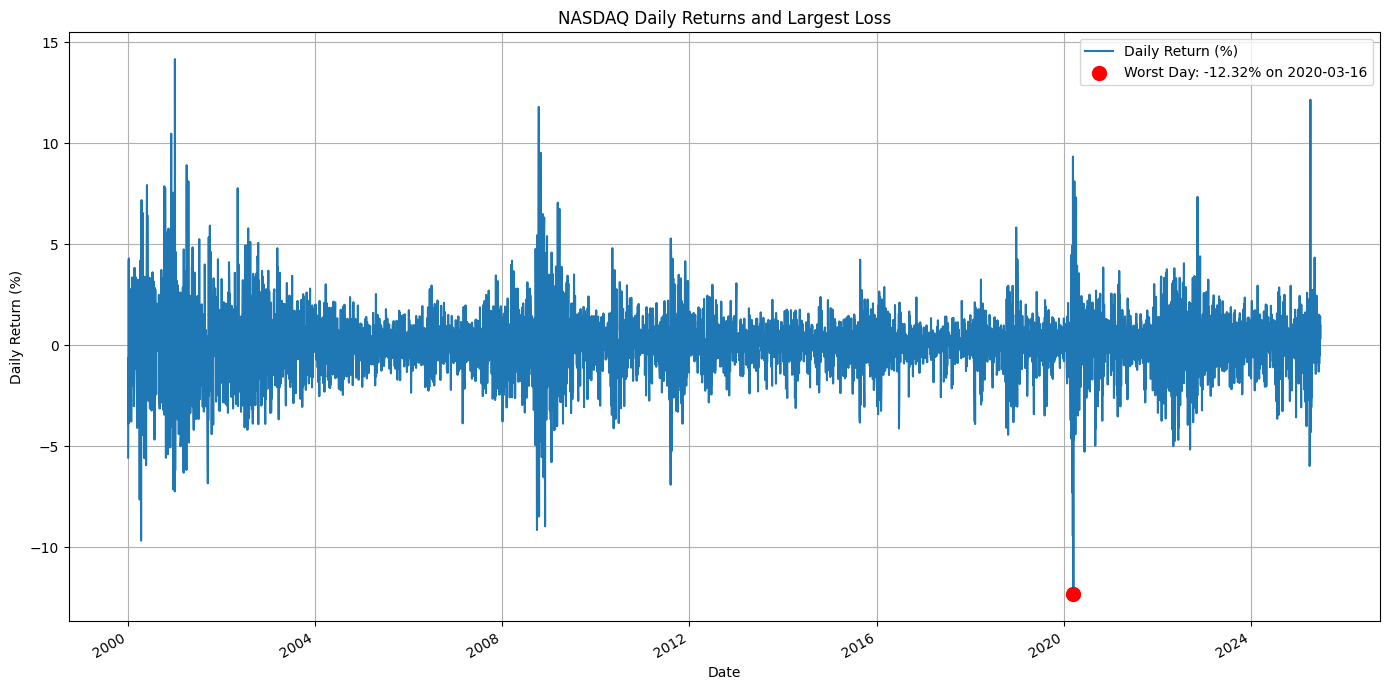

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Download NASDAQ data (if not already done)
# Define specific start and end dates
start_date = "2000-01-01"
end_date = "2025-06-27"
nasdaq = yf.Ticker("^IXIC")
data = nasdaq.history(start=start_date, end=end_date)

# Calculate daily returns in percentage
data['Daily_Return'] = data['Close'].pct_change() * 100

# Find the index and value of the minimum daily return (largest single-day loss)
lowest_loss_index = data['Daily_Return'].idxmin()
lowest_loss_value = data['Daily_Return'].min()

# Plot daily returns and flag the lowest loss
plt.figure(figsize=(14, 7))
ax = plt.gca()
data['Daily_Return'].plot(ax=ax, label='Daily Return (%)')

# Highlight the worst day
ax.scatter(lowest_loss_index, lowest_loss_value, color='red', s=100, zorder=5,
           label=f'Worst Day: {lowest_loss_value:.2f}% on {lowest_loss_index.strftime("%Y-%m-%d")}')

# Add title, labels, legend, and grid
plt.title('NASDAQ Daily Returns and Largest Loss')
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


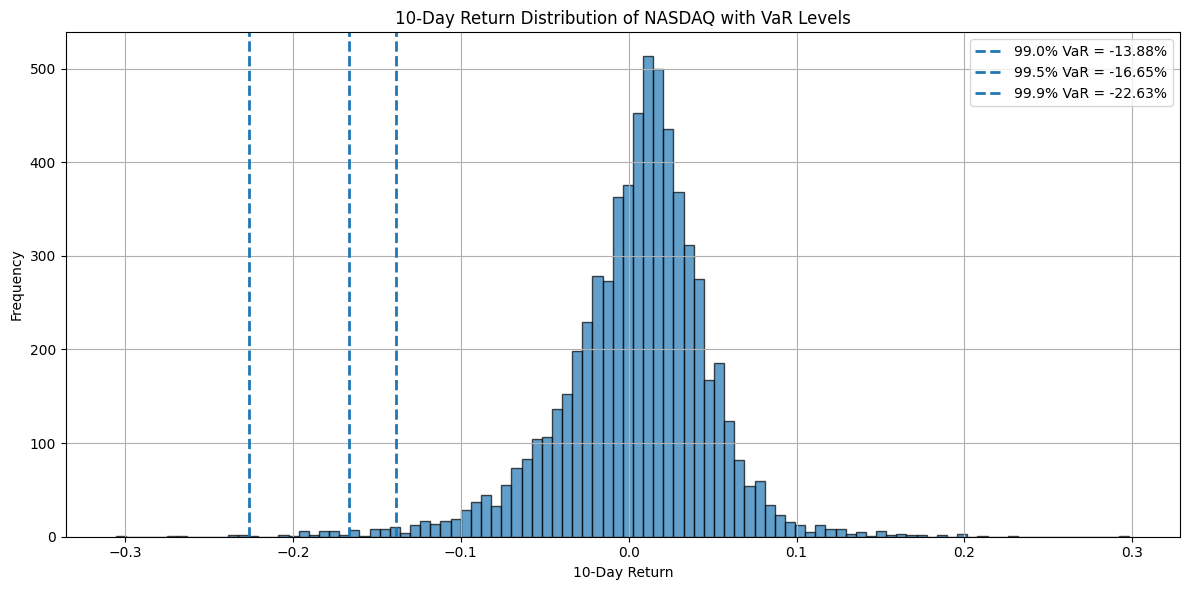


10-Day Value at Risk (VaR) Analysis for $100 Million Portfolio:
 Confidence Level (%)   Alpha 10-Day VaR (%) 10-Day VaR (USD) 1-in-# Event (days) 1-in-# Event (years)
                 99.0 0.01000        -13.88%   $-1,387,731.26               1,000                 4.00
                 99.5 0.00500        -16.65%   $-1,664,778.61               2,000                 8.00
                 99.9 0.00100        -22.63%   $-2,262,797.69              10,000                40.00


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Constants
portfolio_value = 10_000_000  # $100 million
confidence_levels = [99.0, 99.5, 99.9]
alpha_values = [1 - cl/100 for cl in confidence_levels]

# Step 1: Download NASDAQ data
start_date = "2000-01-01"
end_date = "2025-06-27"
nasdaq = yf.Ticker("^IXIC")
data = nasdaq.history(start=start_date, end=end_date)

# Step 2: Calculate daily returns
data['Daily_Return'] = data['Close'].pct_change()

# Step 3: Compute rolling 10-day returns (cumulative sum of 10 daily returns)
rolling_returns = data['Daily_Return'].rolling(window=10).sum().dropna()

# Step 4: Compute VaR values and losses
results = []
for cl, alpha in zip(confidence_levels, alpha_values):
    var_percent = np.percentile(rolling_returns, alpha * 100)
    var_usd = var_percent * portfolio_value
    n_trading_days = 10 / alpha  # Frequency of such an event in trading days
    years = n_trading_days / 250  # Approximate trading years

    results.append({
        "Confidence Level (%)": cl,
        "Alpha": alpha,
        "10-Day VaR (%)": var_percent,
        "10-Day VaR (USD)": var_usd,
        "1-in-# Event (days)": n_trading_days,
        "1-in-# Event (years)": years
    })

# Step 5: Convert results to DataFrame
var_df = pd.DataFrame(results)

# Step 6: Summary statistics
summary = {
    "Mean 10-day Return": rolling_returns.mean(),
    "Standard Deviation": rolling_returns.std()
}
summary_df = pd.DataFrame.from_dict(summary, orient='index', columns=['Value'])
summary_df.index.name = "Metric"
summary_df.reset_index(inplace=True)

# Step 7: Plot the return distribution and VaR levels
plt.figure(figsize=(12, 6))
plt.hist(rolling_returns, bins=100, alpha=0.7, edgecolor='black')

# Plot VaR lines
for row in results:
    plt.axvline(row["10-Day VaR (%)"], linestyle='dashed', linewidth=2, label=f'{row["Confidence Level (%)"]}% VaR = {row["10-Day VaR (%)"]:.2%}')

plt.title('10-Day Return Distribution of NASDAQ with VaR Levels')
plt.xlabel('10-Day Return')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 8: Print DataFrames
var_df_formatted = var_df.copy()
var_df_formatted["Alpha"] = var_df_formatted["Alpha"].map("{:.5f}".format)
var_df_formatted["10-Day VaR (%)"] = var_df_formatted["10-Day VaR (%)"].map("{:.2%}".format)
var_df_formatted["10-Day VaR (USD)"] = var_df_formatted["10-Day VaR (USD)"].map("${:,.2f}".format)
var_df_formatted["1-in-# Event (days)"] = var_df_formatted["1-in-# Event (days)"].map("{:,.0f}".format)
var_df_formatted["1-in-# Event (years)"] = var_df_formatted["1-in-# Event (years)"].map("{:.2f}".format)

# Display formatted results
print("\n10-Day Value at Risk (VaR) Analysis for $100 Million Portfolio:")
print(var_df_formatted.to_string(index=False))


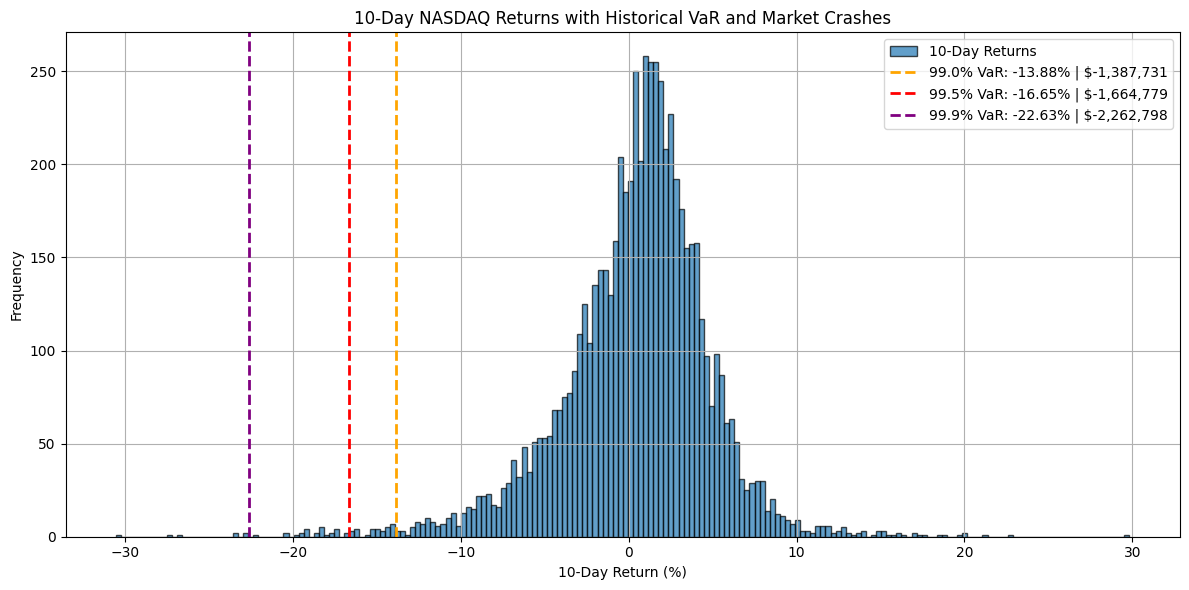


10-Day Value at Risk (VaR) for $10 Million Portfolio:
 Confidence Level (%)  Alpha VaR (%)   VaR (USD)
                 99.0  0.010 -13.88% $-1,387,731
                 99.5  0.005 -16.65% $-1,664,779
                 99.9  0.001 -22.63% $-2,262,798


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Portfolio setup
portfolio_value = 10_000_000
confidence_levels = [99.0, 99.5, 99.9]
alphas = [1 - cl/100 for cl in confidence_levels]

# Download NASDAQ data
nasdaq = yf.Ticker("^IXIC")
data = nasdaq.history(start="2000-01-01", end="2025-06-27")

# Compute daily % returns
data['Daily_Return'] = data['Close'].pct_change()

# Compute 10-day rolling cumulative returns (percentage)
rolling_returns = data['Daily_Return'].rolling(window=10).sum().dropna() * 100

# Compute VaR values (percent and dollar)
var_percent = np.percentile(rolling_returns, [alpha * 100 for alpha in alphas])
var_usd = var_percent / 100 * portfolio_value

# Plot histogram
plt.figure(figsize=(12, 6))
plt.hist(rolling_returns, bins=200, alpha=0.7, edgecolor='black', label='10-Day Returns')

# Plot VaR levels
colors = ['orange', 'red', 'purple']
for cl, vp, vu, color in zip(confidence_levels, var_percent, var_usd, colors):
    plt.axvline(vp, color=color, linestyle='dashed', linewidth=2,
                label=f'{cl:.1f}% VaR: {vp:.2f}% | ${vu:,.0f}')

# Define known crash event dates (we take 10-day return ending on this date)
event_labels = {
    "2000-04-14": "Dot-com Crash",
    "2001-09-17": "9/11",
    "2008-10-15": "GFC Crash",
    "2020-03-16": "COVID Crash",
    "2022-03-07": "Inflation Panic"
}

# Mark crash events on histogram
for date_str, label in event_labels.items():
    try:
        end_idx = pd.to_datetime(date_str)
        start_idx = end_idx - pd.Timedelta(days=14)  # buffer to find valid 10-day period
        window_returns = data.loc[start_idx:end_idx, 'Daily_Return'].dropna().tail(10)
        if len(window_returns) == 10:
            ret_10d = window_returns.sum() * 100  # percent
            loss_usd = ret_10d / 100 * portfolio_value
            plt.axvline(ret_10d, color='black', linestyle=':', linewidth=1.5)
            plt.text(ret_10d, plt.ylim()[1]*0.8, f'{label}\n{ret_10d:.2f}%', rotation=90,
                     verticalalignment='center', fontsize=8)
    except Exception:
        continue

plt.title("10-Day NASDAQ Returns with Historical VaR and Market Crashes")
plt.xlabel("10-Day Return (%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print VaR table
summary_df = pd.DataFrame({
    "Confidence Level (%)": confidence_levels,
    "Alpha": [round(alpha, 5) for alpha in alphas],
    "VaR (%)": var_percent,
    "VaR (USD)": var_usd
})

summary_df["VaR (USD)"] = summary_df["VaR (USD)"].map("${:,.0f}".format)
summary_df["VaR (%)"] = summary_df["VaR (%)"].map("{:.2f}%".format)

print("\n10-Day Value at Risk (VaR) for $10 Million Portfolio:")
print(summary_df.to_string(index=False))


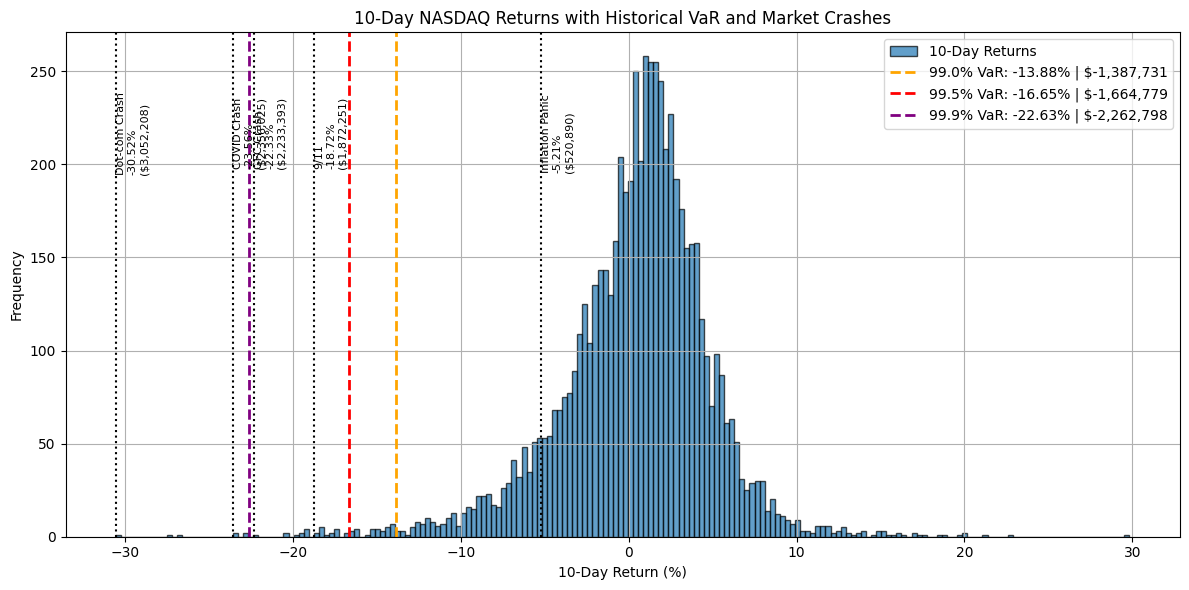


10-Day Value at Risk (VaR) for $10 Million Portfolio:
 Confidence Level (%)  Alpha VaR (%)   VaR (USD)
                 99.0  0.010 -13.88% $-1,387,731
                 99.5  0.005 -16.65% $-1,664,779
                 99.9  0.001 -22.63% $-2,262,798


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Portfolio setup
portfolio_value = 10_000_000
confidence_levels = [99.0, 99.5, 99.9]
alphas = [1 - cl/100 for cl in confidence_levels]

# Download NASDAQ data
nasdaq = yf.Ticker("^IXIC")
data = nasdaq.history(start="2000-01-01", end="2025-06-27")

# Compute daily returns
data['Daily_Return'] = data['Close'].pct_change()

# Compute 10-day rolling returns (in percent)
rolling_returns = data['Daily_Return'].rolling(window=10).sum().dropna() * 100
rolling_returns.index = rolling_returns.index.tz_localize(None)  # ✅ Fix timezone issue

# Compute VaR levels
var_percent = np.percentile(rolling_returns, [alpha * 100 for alpha in alphas])
var_usd = var_percent / 100 * portfolio_value

# Plot histogram
plt.figure(figsize=(12, 6))
plt.hist(rolling_returns, bins=200, alpha=0.7, edgecolor='black', label='10-Day Returns')

# Plot VaR lines
colors = ['orange', 'red', 'purple']
for cl, vp, vu, color in zip(confidence_levels, var_percent, var_usd, colors):
    plt.axvline(vp, color=color, linestyle='dashed', linewidth=2,
                label=f'{cl:.1f}% VaR: {vp:.2f}% | ${vu:,.0f}')

# Define crash events
event_labels = {
    "2000-04-14": "Dot-com Crash",
    "2001-09-17": "9/11",
    "2008-10-15": "GFC Crash",
    "2020-03-16": "COVID Crash",
    "2022-03-07": "Inflation Panic"
}

# Annotate crash dates on the histogram
for date_str, label in event_labels.items():
    try:
        end_date = pd.to_datetime(date_str)  # Now safe, no timezone issues
        ret_series = rolling_returns[:end_date]
        if not ret_series.empty:
            ret_10d = ret_series.iloc[-1]
            loss_usd = ret_10d / 100 * portfolio_value
            plt.axvline(ret_10d, color='black', linestyle=':', linewidth=1.5)
            plt.text(ret_10d, plt.ylim()[1]*0.8,
                     f'{label}\n{ret_10d:.2f}%\n(${abs(loss_usd):,.0f})',
                     rotation=90, verticalalignment='center', fontsize=8)
    except Exception as e:
        print(f"Could not annotate {label}: {e}")

# Final touches
plt.title("10-Day NASDAQ Returns with Historical VaR and Market Crashes")
plt.xlabel("10-Day Return (%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Summary table
summary_df = pd.DataFrame({
    "Confidence Level (%)": confidence_levels,
    "Alpha": [round(a, 5) for a in alphas],
    "VaR (%)": [f"{v:.2f}%" for v in var_percent],
    "VaR (USD)": [f"${v:,.0f}" for v in var_usd]
})

print("\n10-Day Value at Risk (VaR) for $10 Million Portfolio:")
print(summary_df.to_string(index=False))


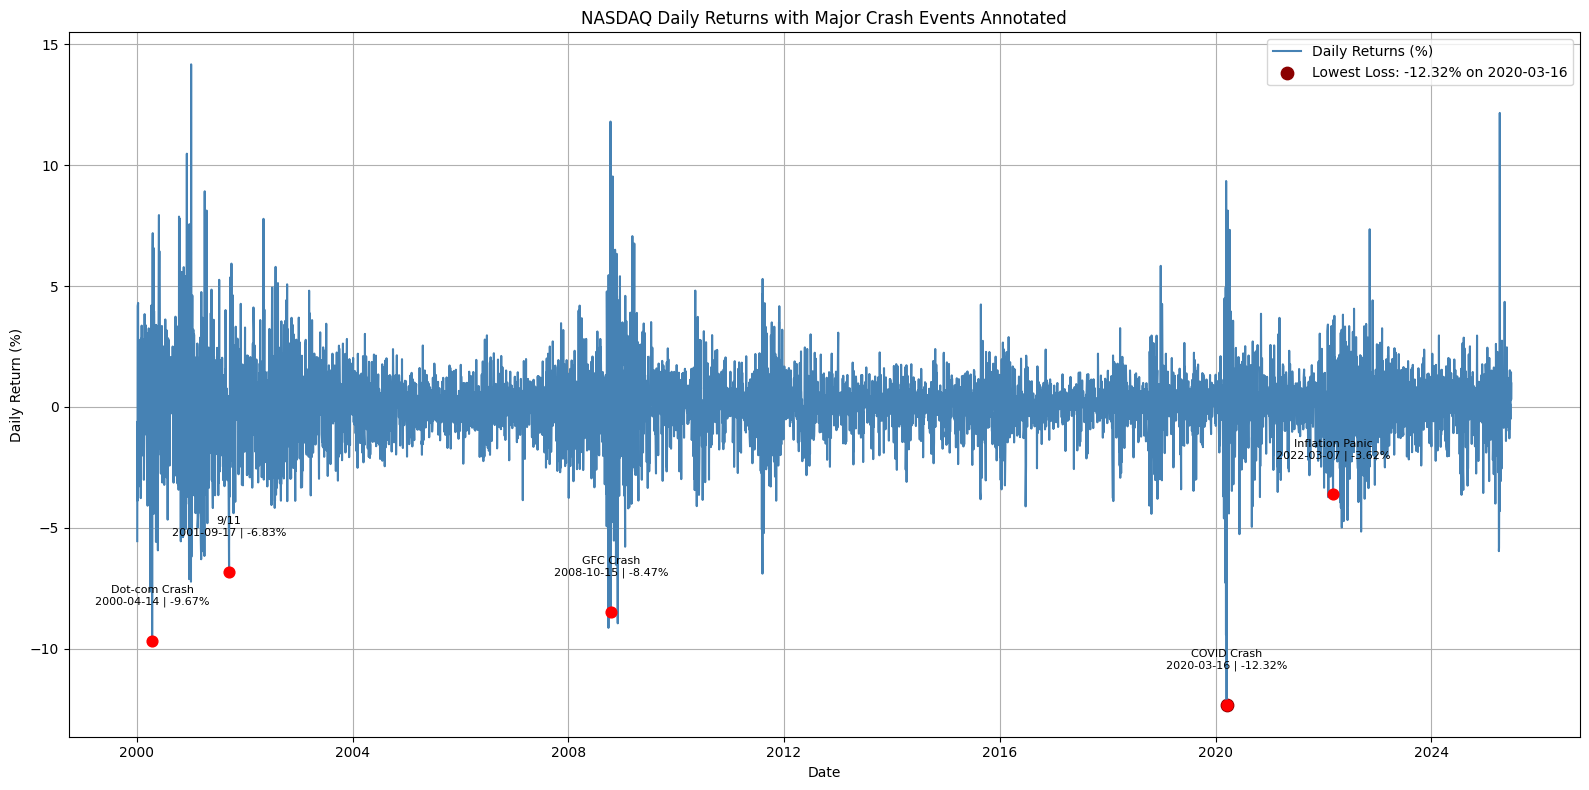

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Download NASDAQ data
nasdaq = yf.Ticker("^IXIC")
data = nasdaq.history(start="2000-01-01", end="2025-06-27")
data['Daily_Return'] = data['Close'].pct_change() * 100
data = data.dropna()

# Define major crash events
crash_events = {
    "2000-04-14": "Dot-com Crash",
    "2001-09-17": "9/11",
    "2008-10-15": "GFC Crash",
    "2020-03-16": "COVID Crash",
    "2022-03-07": "Inflation Panic"
}

# Convert index to timezone-naive just in case
data.index = data.index.tz_localize(None)

# Plot daily returns
plt.figure(figsize=(16, 8))
plt.plot(data.index, data['Daily_Return'], label='Daily Returns (%)', color='steelblue')

# Annotate crash events with fallback to closest date
for date_str, label in crash_events.items():
    event_date = pd.to_datetime(date_str)
    event_data = data.loc[:event_date]
    if not event_data.empty:
        nearest_date = event_data.index[-1]
        y_val = event_data.loc[nearest_date, 'Daily_Return']
        plt.scatter(nearest_date, y_val, color='red', s=60, zorder=5)
        plt.text(nearest_date, y_val + 1.5,
                 f'{label}\n{nearest_date.date()} | {y_val:.2f}%',
                 ha='center', fontsize=8, color='black')

# Highlight worst day
min_index = data['Daily_Return'].idxmin()
min_value = data['Daily_Return'].min()
plt.scatter(min_index, min_value, color='darkred', s=80,
            label=f'Lowest Loss: {min_value:.2f}% on {min_index.date()}')

# Plot formatting
plt.title("NASDAQ Daily Returns with Major Crash Events Annotated")
plt.xlabel("Date")
plt.ylabel("Daily Return (%)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


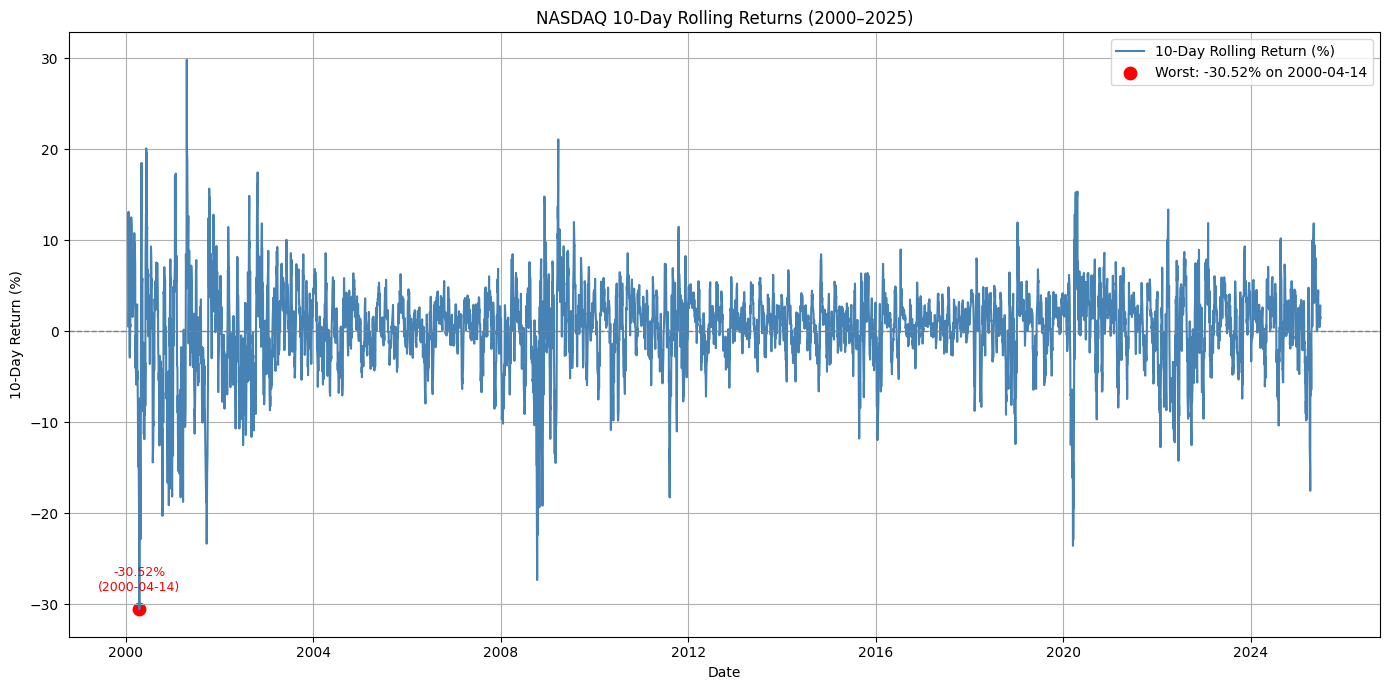

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Download NASDAQ data
nasdaq = yf.Ticker("^IXIC")
data = nasdaq.history(start="2000-01-01", end="2025-06-27")
data['Daily_Return'] = data['Close'].pct_change()

# Calculate 10-day rolling returns (in %)
data['10D_Return'] = data['Daily_Return'].rolling(window=10).sum() * 100
data = data.dropna()
data.index = data.index.tz_localize(None)  # Remove timezone if present

# Identify the worst 10-day return and its date
worst_date = data['10D_Return'].idxmin()
worst_return = data['10D_Return'].min()

# Plot
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['10D_Return'], label='10-Day Rolling Return (%)', color='steelblue')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)

# Highlight worst 10-day return
plt.scatter(worst_date, worst_return, color='red', s=80, label=f'Worst: {worst_return:.2f}% on {worst_date.date()}')
plt.text(worst_date, worst_return + 2, f'{worst_return:.2f}%\n({worst_date.date()})',
         ha='center', fontsize=9, color='red')

# Formatting
plt.title('NASDAQ 10-Day Rolling Returns (2000–2025)')
plt.xlabel('Date')
plt.ylabel('10-Day Return (%)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


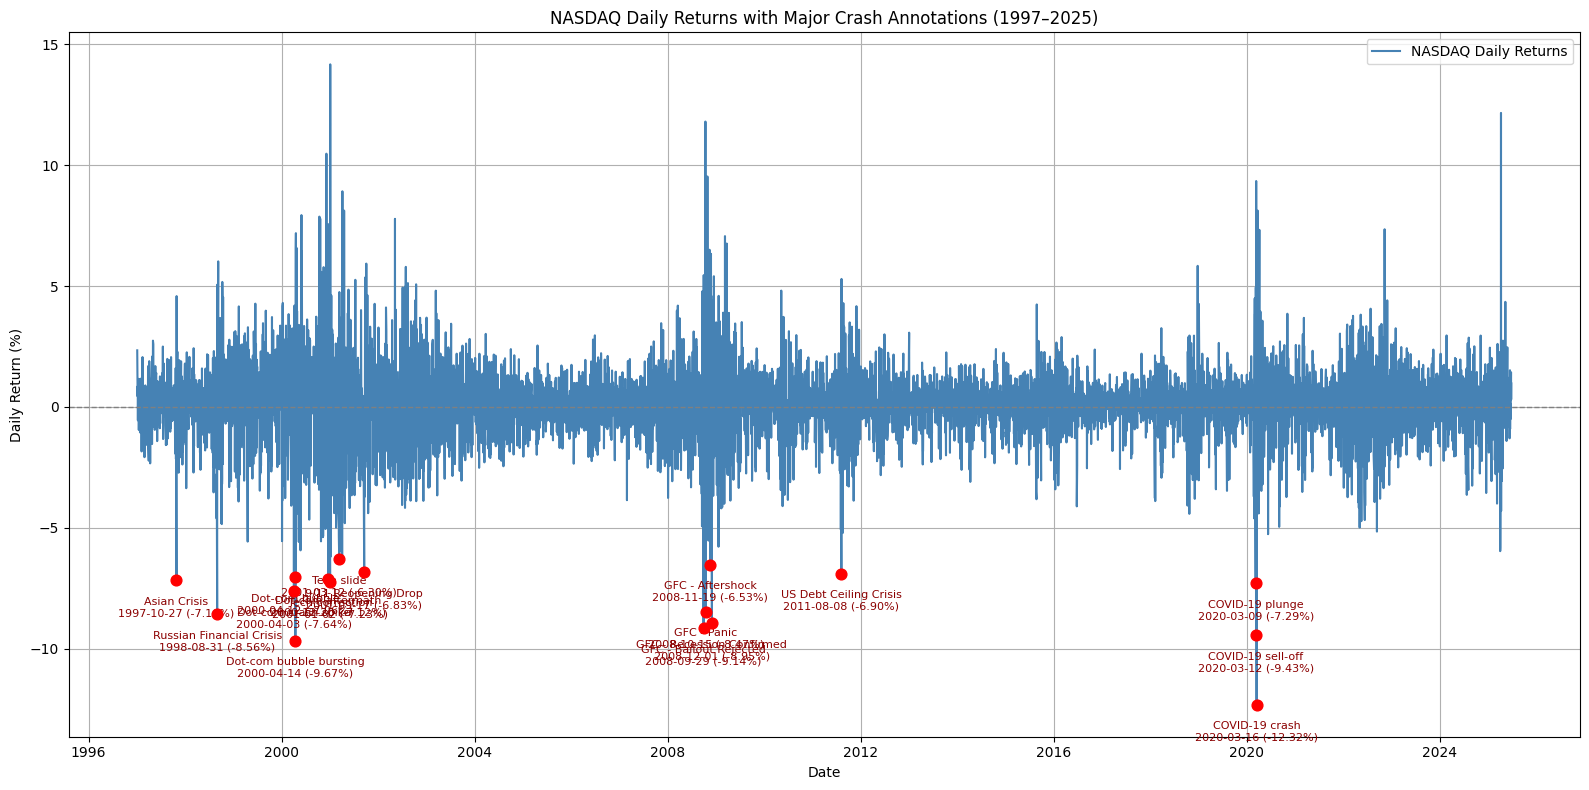

In [3]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Download NASDAQ data
nasdaq = yf.Ticker("^IXIC")
data = nasdaq.history(start="1997-01-01", end="2025-06-27")
data['Daily_Return'] = data['Close'].pct_change() * 100
data.dropna(inplace=True)
data.index = data.index.tz_localize(None)

# Step 2: Define the top crash events with annotations
event_data = [
    ("2020-03-16", -12.32, "COVID‑19 crash"),
    ("1987-10-19", -11.35, "Black Monday"),
    ("2000-04-14", -9.67, "Dot‑com bubble bursting"),
    ("2020-03-12", -9.43, "COVID‑19 sell-off"),
    ("2008-09-29", -9.14, "GFC - Bailout Rejected"),
    ("1987-10-26", -9.01, "Black Monday follow-up"),
    ("1987-10-20", -9.00, "Black Monday follow-up"),
    ("2008-12-01", -8.95, "GFC - Recession Confirmed"),
    ("1998-08-31", -8.56, "Russian Financial Crisis"),
    ("2008-10-15", -8.47, "GFC - Panic"),
    ("2000-04-03", -7.64, "Dot‑com crash spike"),
    ("2020-03-09", -7.29, "COVID‑19 plunge"),
    ("2001-01-02", -7.23, "Tech correction"),
    ("2000-12-20", -7.12, "Dot‑com aftermath"),
    ("2000-04-12", -7.06, "Dot‑com bubble"),
    ("1997-10-27", -7.02, "Asian Crisis"),
    ("2011-08-08", -6.90, "US Debt Ceiling Crisis"),
    ("2001-09-17", -6.83, "9/11 Reopening Drop"),
    ("2008-11-19", -6.53, "GFC - Aftershock"),
    ("2001-03-12", -6.30, "Tech slide")
]

events_df = pd.DataFrame(event_data, columns=["Date", "Drop", "Event"])
events_df["Date"] = pd.to_datetime(events_df["Date"])

# Step 3: Filter events to match index and annotate
plt.figure(figsize=(16, 8))
plt.plot(data.index, data['Daily_Return'], label="NASDAQ Daily Returns", color='steelblue')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)

for _, row in events_df.iterrows():
    date = row["Date"]
    if date in data.index:
        drop = data.loc[date, 'Daily_Return']
        plt.scatter(date, drop, color='red', s=60, zorder=5)
        plt.text(date, drop - 1.5, f'{row["Event"]}\n{date.date()} ({drop:.2f}%)',
                 ha='center', fontsize=8, color='darkred')

# Plot settings
plt.title("NASDAQ Daily Returns with Major Crash Annotations (1997–2025)")
plt.xlabel("Date")
plt.ylabel("Daily Return (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


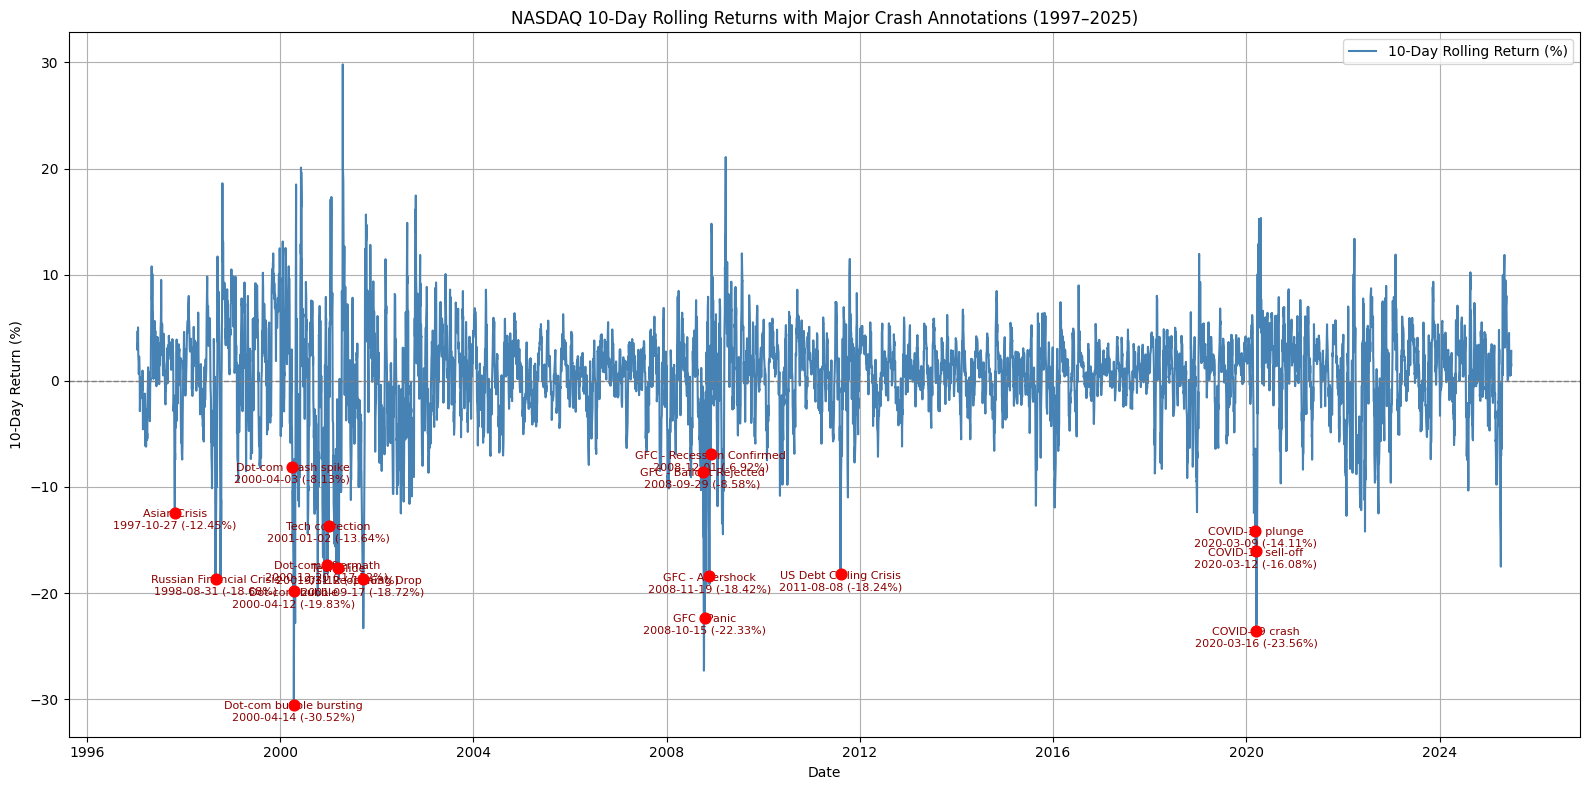

In [4]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Download NASDAQ data
nasdaq = yf.Ticker("^IXIC")
data = nasdaq.history(start="1997-01-01", end="2025-06-27")
data['Daily_Return'] = data['Close'].pct_change()
data['10D_Return'] = data['Daily_Return'].rolling(window=10).sum() * 100
data.dropna(inplace=True)
data.index = data.index.tz_localize(None)

# Step 2: Define major crash events
event_data = [
    ("2020-03-16", "COVID‑19 crash"),
    ("1987-10-19", "Black Monday"),
    ("2000-04-14", "Dot‑com bubble bursting"),
    ("2020-03-12", "COVID‑19 sell-off"),
    ("2008-09-29", "GFC - Bailout Rejected"),
    ("1987-10-26", "Black Monday follow-up"),
    ("1987-10-20", "Black Monday follow-up"),
    ("2008-12-01", "GFC - Recession Confirmed"),
    ("1998-08-31", "Russian Financial Crisis"),
    ("2008-10-15", "GFC - Panic"),
    ("2000-04-03", "Dot‑com crash spike"),
    ("2020-03-09", "COVID‑19 plunge"),
    ("2001-01-02", "Tech correction"),
    ("2000-12-20", "Dot‑com aftermath"),
    ("2000-04-12", "Dot‑com bubble"),
    ("1997-10-27", "Asian Crisis"),
    ("2011-08-08", "US Debt Ceiling Crisis"),
    ("2001-09-17", "9/11 Reopening Drop"),
    ("2008-11-19", "GFC - Aftershock"),
    ("2001-03-12", "Tech slide")
]

events_df = pd.DataFrame(event_data, columns=["Date", "Event"])
events_df["Date"] = pd.to_datetime(events_df["Date"])

# Step 3: Plot and annotate 10-day returns
plt.figure(figsize=(16, 8))
plt.plot(data.index, data['10D_Return'], label="10-Day Rolling Return (%)", color='steelblue')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)

for _, row in events_df.iterrows():
    date = row["Date"]
    # Align to nearest available date in data
    if date in data.index:
        drop = data.loc[date, '10D_Return']
        plt.scatter(date, drop, color='red', s=60, zorder=5)
        plt.text(date, drop - 1.5, f'{row["Event"]}\n{date.date()} ({drop:.2f}%)',
                 ha='center', fontsize=8, color='darkred')

# Final formatting
plt.title("NASDAQ 10-Day Rolling Returns with Major Crash Annotations (1997–2025)")
plt.xlabel("Date")
plt.ylabel("10-Day Return (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
